In [24]:
from stockfish import Stockfish
import os
import chess
import eval as model
import math
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [35]:
# load stockfish model
stockfish = Stockfish(
    # path=os.path.abspath("stockfish/stockfish-macos-x86-64-bmi2")
    path=os.path.abspath(
        "stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe"
    )
)

In [34]:
def play_stockfish(isWhite, graph=False, elo=900, debug=True):

    # make new board
    board = chess.Board()
    model_turn = isWhite
    evals = []

    # while loop until someone loses
    while not board.is_checkmate() and not board.is_stalemate() and not board.is_insufficient_material() and len(evals)<100:

        #show board for debugging
        if debug:
            clear_output(wait=True)
            print(f"Move {len(evals)}")
            print(board)

        # query a model, move on board
        if model_turn:
            move, eval_score = model.predict_move_fen(
                board.fen(),
                depth=2,
                top_n=4,
                use_neural_minimax=False,
                first_move_all_legal=False,
            )

            board.push_uci(move)
            model_turn = False

        else:
            # set stockfish to shitty
            stockfish.set_elo_rating(elo)

            stockfish.set_fen_position(board.fen())
            board.push_uci(stockfish.get_best_move())
            model_turn = True

        # add stockfish eval to list for graphing
        if graph:
            stockfish.set_elo_rating(2500)
            stockfish.set_fen_position(board.fen())
            curr_eval = stockfish.get_evaluation()
            if curr_eval["type"] == "cp":
                evals.append(curr_eval["value"])
            else:
                if(curr_eval["value"] == 0):
                    continue
                evals.append(3000 * math.copysign(1, curr_eval["value"]))

    #show plot
    if graph:
        plt.plot(evals, label="eval")
        plt.xlabel("Move")
        plt.ylabel("Eval (CP)")
        # plt.yscale("log")
        plt.title(f"Model vs. Stockfish ({elo} elo)")
        plt.show()

    if board.is_stalemate() or board.is_insufficient_material():
        return None
    return board.outcome().winner  # returns true if white won, false if black



In [ ]:
# play n games against stockfish, return num won, 50/50 white black
def play_multiple(n, elo):
    # set accumulator
    # call above func n times
    pass

Move 91
b . . . . . . .
P . . k . . . .
. P . . . . p .
. . . q . . p .
. . . P . . n .
. . B . p . . P
. . . . . . r .
. . . . R K . .


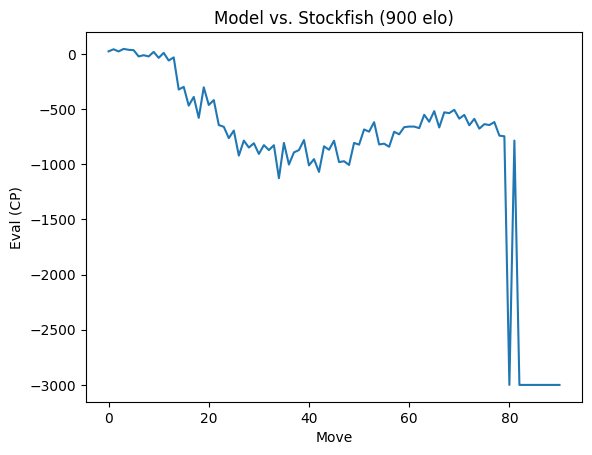

Result: False


In [36]:
res = play_stockfish(True, True)
print(f"Result: {res}")